<center>
    <img src="https://www.clearlyrated.com/brand-logo/talent-path" width="500" alt="cognitiveclass.ai logo"  />
</center>

# Installation

`pip install mglearn`
<br>
`pip install mlxtend` 
<br>
`pip install pydotplus`
<br>
[graphviz](https://forum.graphviz.org/t/new-simplified-installation-procedure-on-windows/224)  


<center>
    <img src="https://miro.medium.com/max/3106/1*U_waDH-LM5e-hl_2Qdrv6Q.png"  width="1000" alt="sklearn classifier"  />
</center>

# Decision Trees
A decision tree is a supervised machine learning algorithm that can be used for both classification and regression problems.<br> A decision tree is simply a series of sequential decisions made to reach a specific result.


In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
import warnings
warnings.filterwarnings("ignore") 

### Reading Decission Trees

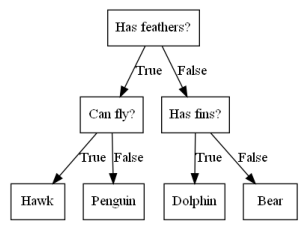

In [3]:
mglearn.plots.plot_animal_tree()

### Training and Visualizing
[Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [15]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [14]:
# Load Iris data set
iris = load_iris()

In [16]:
# Load feautres and targets 
X = load_iris().data
y = load_iris().target

In [19]:
# Feature names
feature_names = load_iris().feature_names
# Target names
target_names = load_iris().target_names

print(target_names)
print(feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [21]:
# Create Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [22]:
# Create an instance of Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth = 5)
# Fit the Model 
tree_clf.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=5)

In [23]:
# Predictions
y_pred = tree_clf.predict(X_test)

In [24]:
# Decision Tree Graph Dependencies 
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

In [25]:
# Store Graph information 
dot_data = export_graphviz(
    tree_clf,
    out_file = None,
    feature_names = feature_names,
    class_names = target_names,
    rounded = True,
    filled = True
)

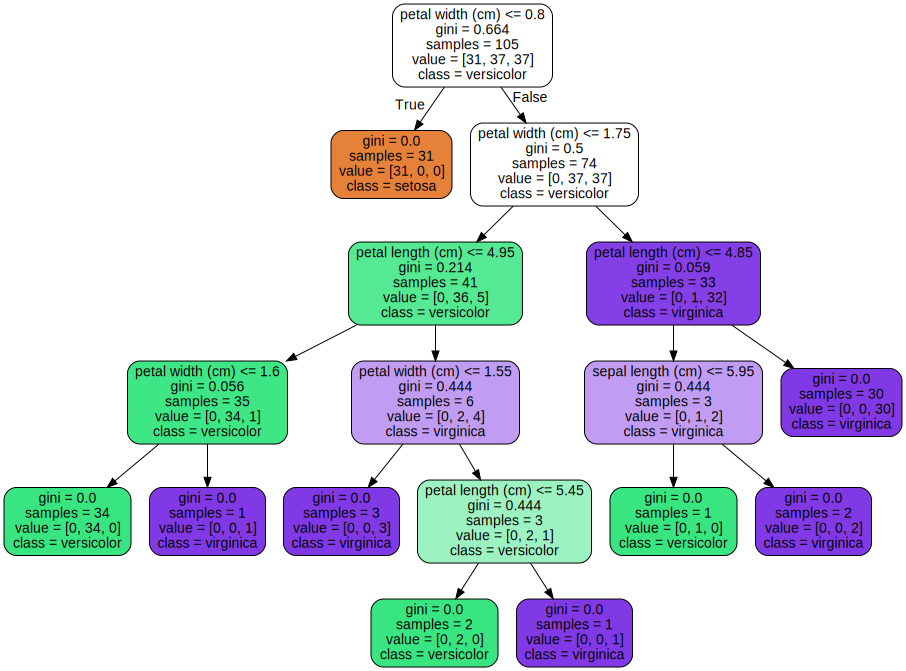

In [33]:
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('iris_tree.png')
graph = graphviz.Source(dot_data)
graph

### Parts of a Decision Tree

<li>Nodes Split for the value of a certain attribute</li>
<li>Root The Node that performs the first split</li>
<li>Leaves Terminal nodes that predict the outcome</li>
<li>Edges Outcome of a split to next node</li>

## Ginnie Impurity or Entropy

Classification trees measure their information gain either by "Entrophy" and "Gini Impurity"<br>
The best result for those values is also zero, and the worst result occurs when every category has an
equal likelihood of being at any given node.<br>

Gini equation

\begin{equation*}
Gini  Index = 1- \sum_{i=1}^{n} (p_{i})^2
\end{equation*}

Where p is the probability of having a given data class in your data set.
A set's entropy is zero when it contains instances of only one class.

Entropy is the measurement of the impurity or randomness in the data points.

\begin{equation*}
Entrophy = - {\sum_{i=1}^{n}} p_{i}*\log_2(p_i)
\end{equation*}


## CART Training Algorithm

Scikit-Learn uses the Classification and Regression Tree (CART) algorithm to train Decision Trees.
The algorithm works by first splitting the trainning set into two subsets using a single feature <strong>k</strong> and threshold <strong>tk</strong> (e.g., "petal length <= 2.45 cm"). How does it choose <strong>k</strong> and <strong>$t_k$</strong>? It searches for the pair (<strong>k, $t_k$</strong>) that produces the purest subsets (weighted by their size) Equation 6-2 gives the cost function that the algorithm tries to minimize.

Once the CART algorithm has successfully split the training set in two, it splits the subset using the same logic, then the sub-sets, and so on, recursively. It stops recursing once it reaches the maximum depth (defined by the max_depth hyperparameter), or if can not find a split that will reduce impurity. A few other hyperparameters (described in a moment) control additional stopping conditions (<strong>min_samples_split, min_samples_leaf, min_weight_fraction_leaf,</strong> and <strong>max_leaf_nodes</strong>)

\begin{equation*}
J(k,t_k) = {\frac{m_{left}}{m}}{G_{left}}+{\frac{m_{right}}{m}}{G_{right}}
\end{equation*}

$G_{left/right}$ measures the impurity of the left/right subset. <br>
$m_{left/right}$ is the number of instances in the left/right subset.

___


# Random Forest


<li>In terms of accuracy, this algorithm outperforms other single hypothesis based algorithms.</li>
<li>It is extremely efficient over large datasets.</li>
<li>Variable deletion is not required in a random forest-based model.</li>
<li>This model can provide the importance of a feature in the model being trained.</li>
<li>IT produces an internal estimate of the unbiasedness of the generalized error.</li>
<li>Random forest generates proximity between the input vector thus giving an insight view of the data.</li>


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [43]:
forest = RandomForestClassifier(n_estimators = 100, random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=1)

In [44]:
y_pred = forest.predict(X_test)
accuracy_score(y_test,y_pred)
# perfect accuracy doesn't exists

1.0

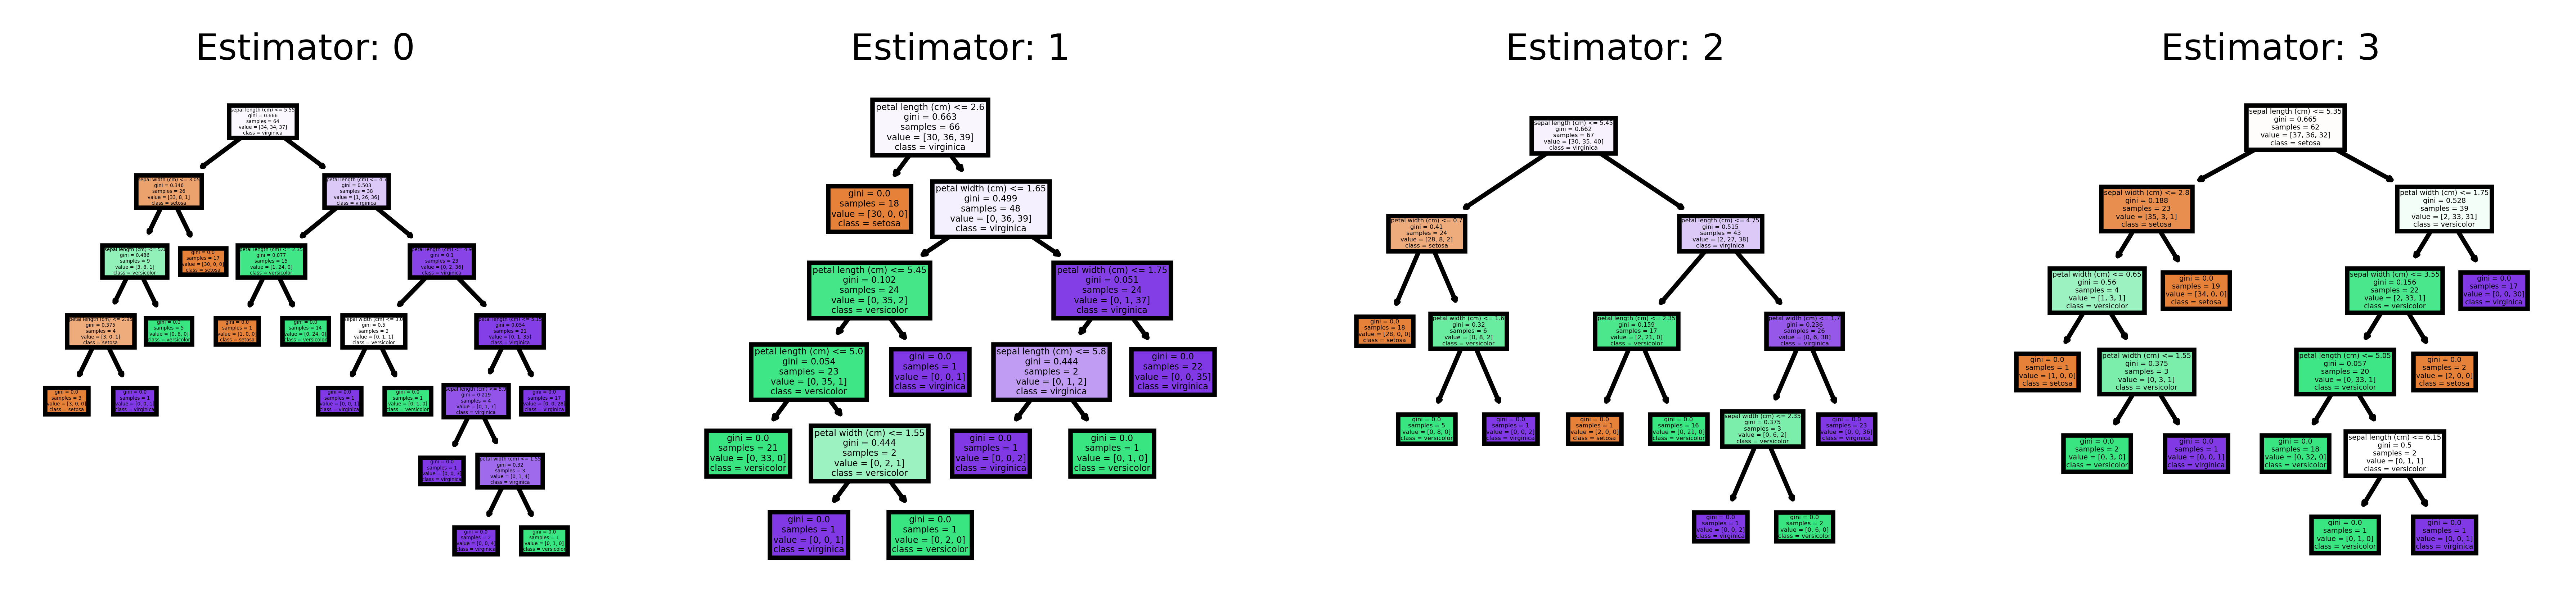

In [50]:
# Trees in Forest
fn = iris.feature_names
cn = iris.target_names

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,2), dpi=900)
for index in range(0,4):
    tree.plot_tree(forest.estimators_[index],
                  feature_names= fn,
                  class_names= cn,
                  filled = True,
                  ax = ax[index])
    ax[index].set_title('Estimator: ' + str(index), fontsize = 8)
fig.savefig('rf_5trees.png')

## Evaluation & Metrics

In [51]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, plot_confusion_matrix, roc_curve, roc_auc_score, f1_score, auc

### Feature Importance

In [18]:
sns.set()

In [53]:
# Calculate feature importance for random forest model
importance = forest.feature_importances_

In [54]:
# get importance
for feature in zip(iris.feature_names, forest.feature_importances_):
    print(feature)

('sepal length (cm)', 0.1252682878987803)
('sepal width (cm)', 0.03875113644245997)
('petal length (cm)', 0.4198590764521374)
('petal width (cm)', 0.4161214992066223)


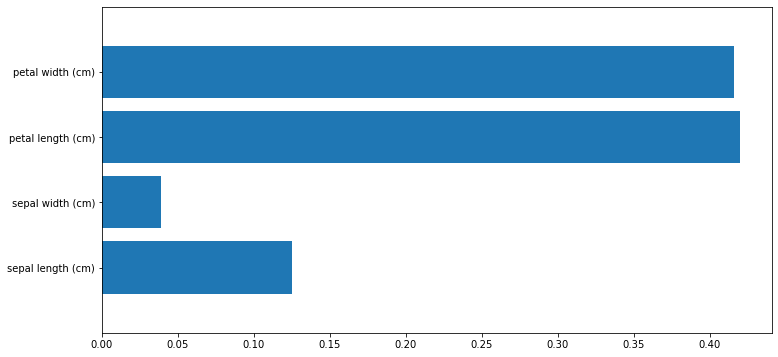

In [64]:
# Plot feature importance
# NO LONGER APPLICABLE
#iris_features = [x for i, x in enumerate(pd.DataFrame(X_train, columns=feature_names).columns) if i != 17]
iris_features = fn

# our df contains our feature values but not our feature names?

def plot_feature_importances(forest):
    plt.figure(figsize=(12,6))
    n_features = 4
    plt.barh(range(n_features), forest.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris_features)
    plt.ylim(-1, n_features)
plot_feature_importances(forest)

### Classification Report

In [22]:
predictions = forest.predict(X_test)
print(classification_report())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



<strong>Precision — What percent of your predictions were correct? </strong><br>
Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of a true positive and false positive.<br>
Simple terms: Accuracy of positive predictions or how many are correctly classified among that class<br>
$$Precision= TP/(TP + FP)$$

<strong>Recall — What percent of the positive cases did you catch?</strong><br>
Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.<br>
Simple terms: Fraction of positives that were correctly identified<br>
$$Recall = TP/(TP+FN)$$

<strong>F1 score — What percent of positive predictions were correct?</strong><br> 
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.<br>
$$F1 Score = 2*(Recall * Precision) / (Recall + Precision)$$

<strong>Support</strong> <br>
Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

<strong>Accuracy</strong><br>
It gives you the overall accuracy of the model, meaning the fraction of the total samples that were correctly classified by the classifier.<br>
$$(TP+TN)/(TP+TN+FP+FN)$$

<strong>Macro Avg (macro f1)</strong><br>
It calculates metrics for each class individually and then takes unweighted mean of the measures.


<strong>Weighted F1</strong><br>
The last one is weighted-averaged F1-score. Unlike Macro Avg, it takes a weighted mean of the measures. The weights for each class are the total number of samples of that class.

### Confusion Matrix

A <strong>Confusion Matrix</strong> is an N x N matrix used for evaluating the performance of a classification model, where <strong>N</strong> is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. <br>
For binary classification, a confusion matrix has two rows and two columns, and shows how many Positive samples were predicted as Positive $TP$ or Negative $FP$ (the first column), and how many Negative photos were predicted as Positive $FN$ or Negative $TN$ (the second column). 

Binary classification problems often focus on a Positive class which we want to detect. In contrast, in a typical multi-class classification problem, we need to categorize each sample into 1 of N different classes.

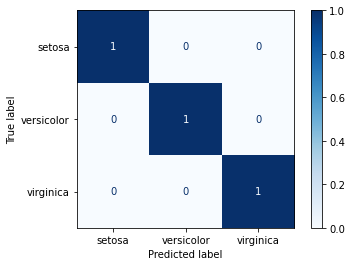

In [68]:
# Plot Confusion Matrix
plot_confusion_matrix(forest, X_test, y_test, cmap = plt.cm.Blues, display_labels = target_names, normalize='true')
plt.grid(False)

### ROC Curve

The Receiver Operating Characteristic curve (ROC) is a plot of the false positive rate <strong>FPR</strong> (x-axis) versus the true positive rate <strong>TPR</strong> (y-axis) for a number of different candidate threshold values between 0.0 and 1.0.

In [24]:

# roc curve for models



# roc curve for tpr = fpr 


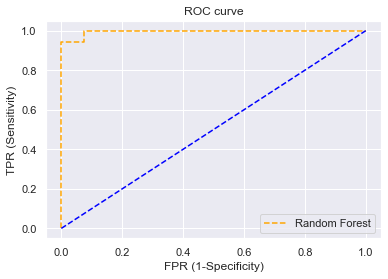

## Decision Regions

This is a plot that shows how a fit machine learning algorithm predicts a coarse grid across the input feature space.

A decision surface plot is a powerful tool for understanding how a given model “sees” the prediction task and how it has decided to divide the input feature space by class label.

In [69]:
from mlxtend.plotting import plot_decision_regions

In [70]:
iris = load_iris()
X= iris.data[:,2:] #petal lenght and width
y= iris.target

In [71]:
# Create Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=1)

In [72]:
# Create an instance of Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=5) #max_depth is a stopping criteria
# Fit the Model 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [73]:
# Target names
print(f'Target Class Names:{load_iris().target_names}')

Target Class Names:['setosa' 'versicolor' 'virginica']


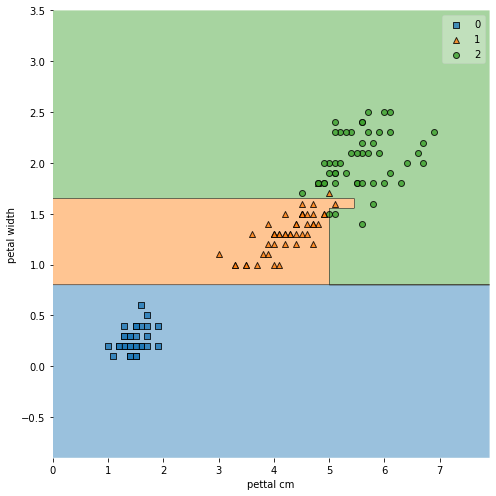

In [81]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

fig, ax = plt.subplots(figsize=(7,7))
plot_decision_regions(X_combined,y_combined, clf=tree_clf)
plt.xlabel('pettal cm')
plt.ylabel('petal width')
plt.tight_layout()
plt.show()

___